In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load & Understand the Dataset:

In [4]:
df = pd.read_csv('IPL Matches 2008-2020.csv')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
# info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
# describe():

df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


### Step 2: Check for Missing and Duplicate values

In [8]:
# missing:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [14]:
# duplicates:
df.duplicated().sum()

0

### Step 3: Summary Staistics

In [15]:
# Select numeric columns only:

num_df = df.select_dtypes(include = 'number')
num_df

,id,neutral_venue,result_margin
0,335982,0,140.0
1,335983,0,33.0
2,335984,0,9.0
3,335985,0,5.0
4,335986,0,5.0
...,...,...,...
811,1216547,0,NaN
812,1237177,0,57.0
813,1237178,0,6.0
814,1237180,0,17.0


In [16]:
# Calculate summary statistics:

summary_statistics = num_df.describe().T
summary_statistics

,count,mean,std,min,25%,50%,75%,max
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0


In [17]:
# Add "Mode" to summary statistics:

summary_statistics['Mode'] = num_df.mode().iloc[0]
summary_statistics

,count,mean,std,min,25%,50%,75%,max,Mode
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0,335982.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0,0.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0,6.0


In [18]:
# Add IQR (Interquartile Range):

summary_statistics['IQR'] = summary_statistics['75%'] - summary_statistics['25%']
summary_statistics

,count,mean,std,min,25%,50%,75%,max,Mode,IQR
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0,335982.0,581398.5
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0,0.0,0.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0,6.0,13.5


### Step 4: Distribution and Outlier Detection
* Histogram: Check frequency distribution for numerical columns
* Boxplot: Identify Outliers for numerical columns

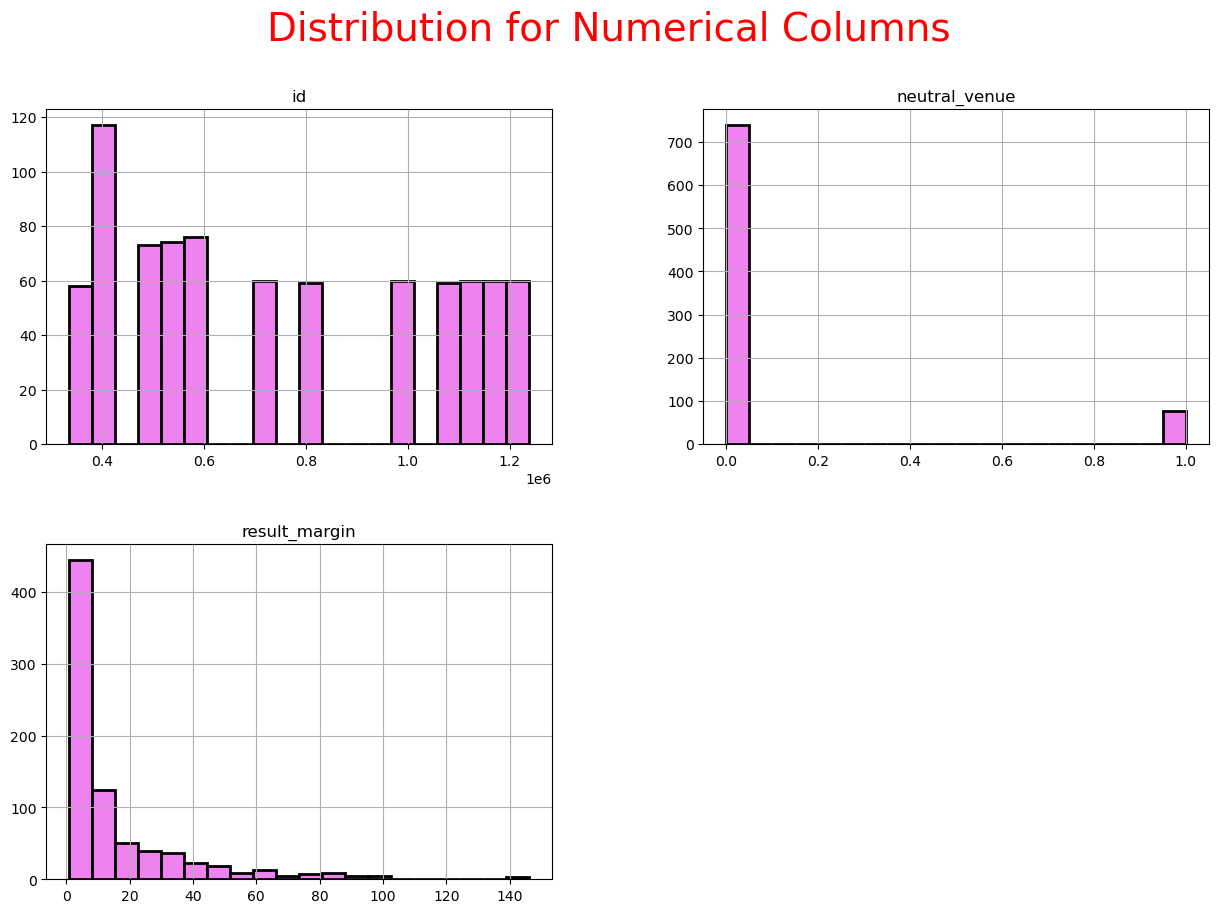

In [19]:
# Histogram:

num_df.hist(bins = 20, figsize = (15, 10), color = 'violet', edgecolor = 'black', linewidth = 2)


plt.suptitle("Distribution for Numerical Columns", c = 'r', size = 28)
plt.show()

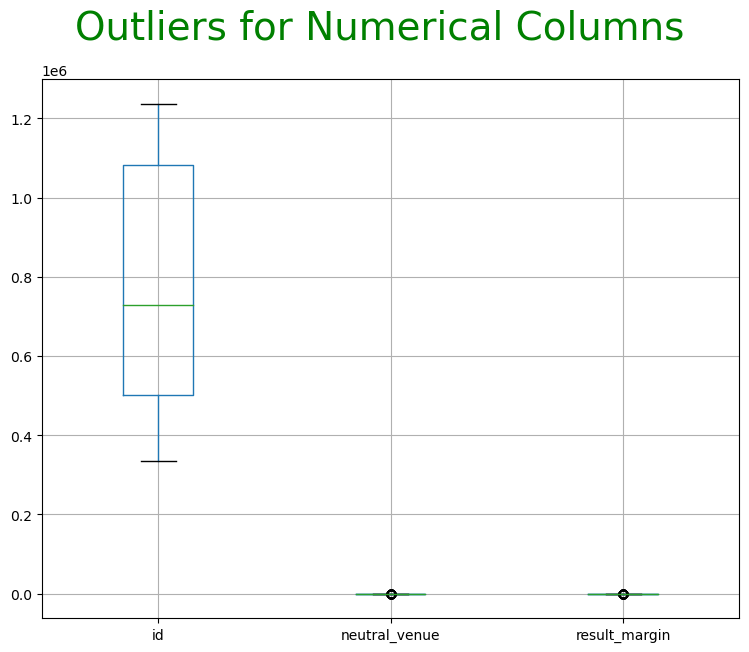

In [21]:
# Boxplot:

num_df.boxplot(figsize = (9, 7))

plt.suptitle("Outliers for Numerical Columns", c = 'g', size = 28)
plt.show()

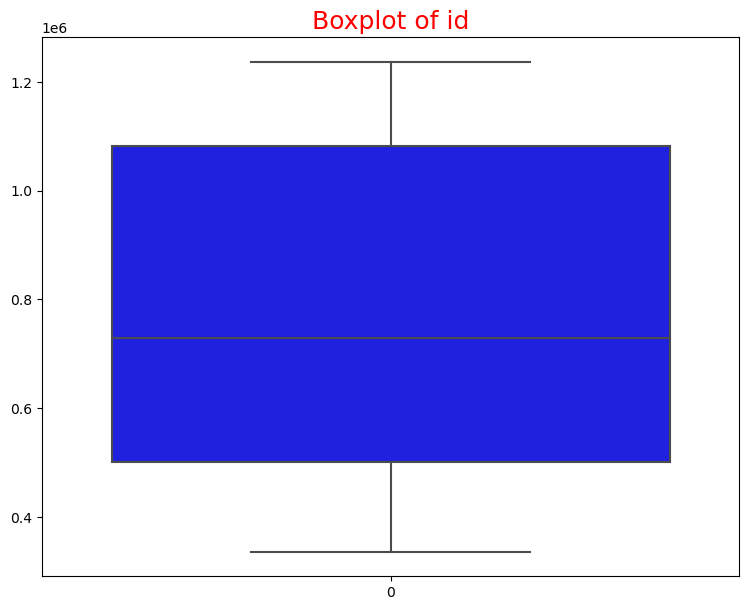

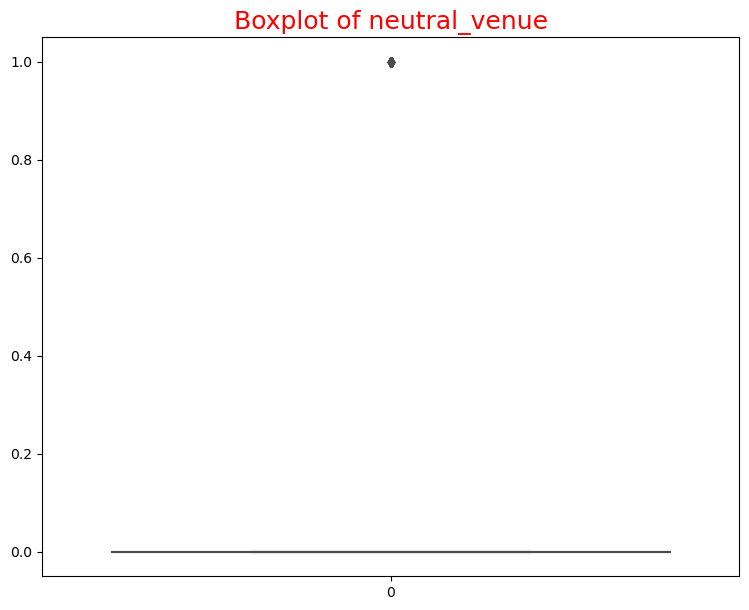

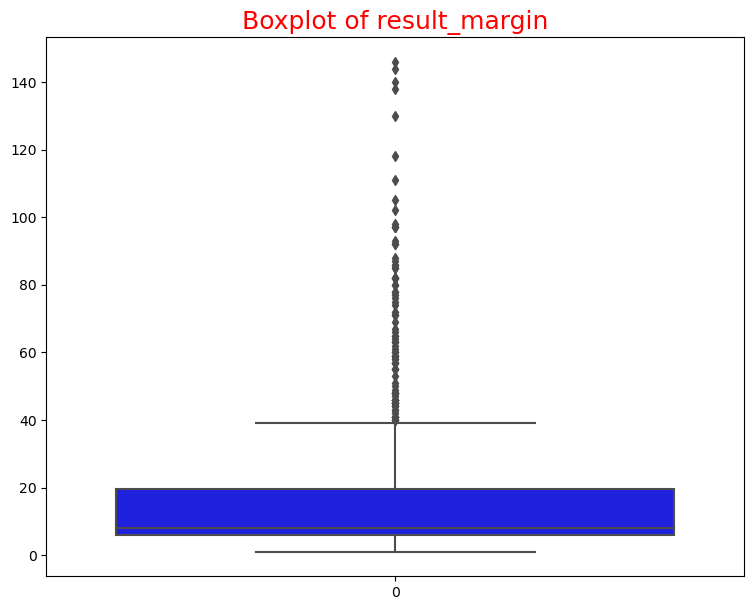

In [44]:
for col in num_df.columns:
    plt.figure(figsize=(9, 7))
    sns.boxplot(num_df[col], color = 'blue')
    
    plt.title(f'Boxplot of {col}', c = 'red', size = 18)
    plt.show()

### Another Way:

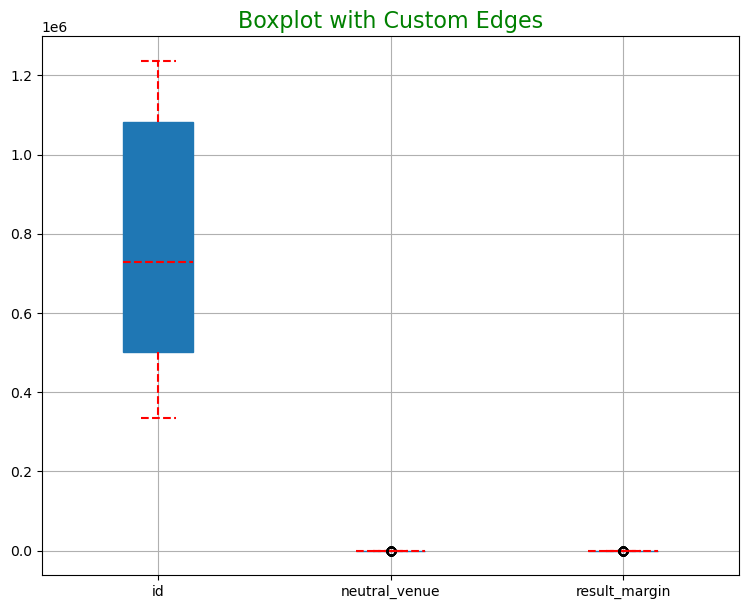

In [22]:
ax = num_df.boxplot(figsize=(9, 7), patch_artist=True)  # Use patch_artist for box customization

# Customize the edge color and line width
for box in ax.artists:  # box patches
    box.set_edgecolor('black')  # Set edge color
    box.set_linewidth(2)        # Set line width
    box.set_facecolor('lightblue')  # Optional: Set box fill color
    
    
# Customize the median line:
for line in ax.lines:
    line.set_linestyle('--')
    line.set_color('red')
    line.set_linewidth(1.5)

# Add labels and title
plt.title("Boxplot with Custom Edges", fontsize=16, c = 'g')
plt.show()

### Check for Skewness and Kurtosis:

In [23]:
# Skewness:

num_skew = num_df.skew()
num_skew

id               0.210675
neutral_venue    2.780289
result_margin    2.692045
dtype: float64

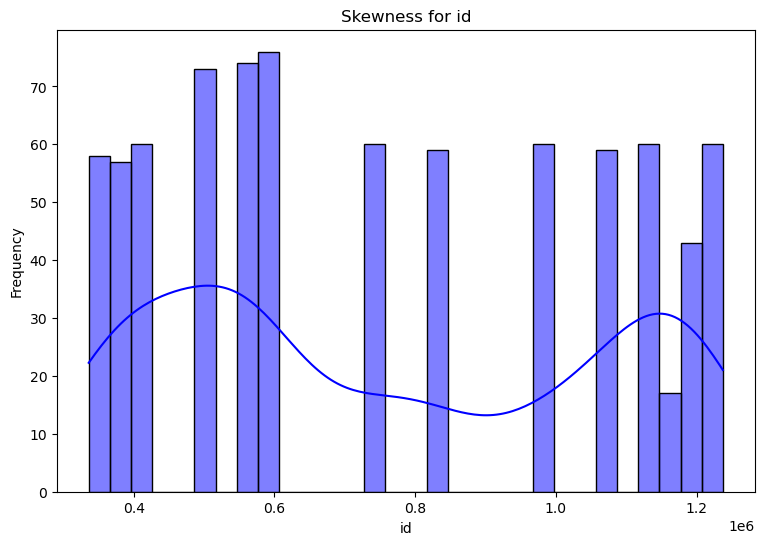

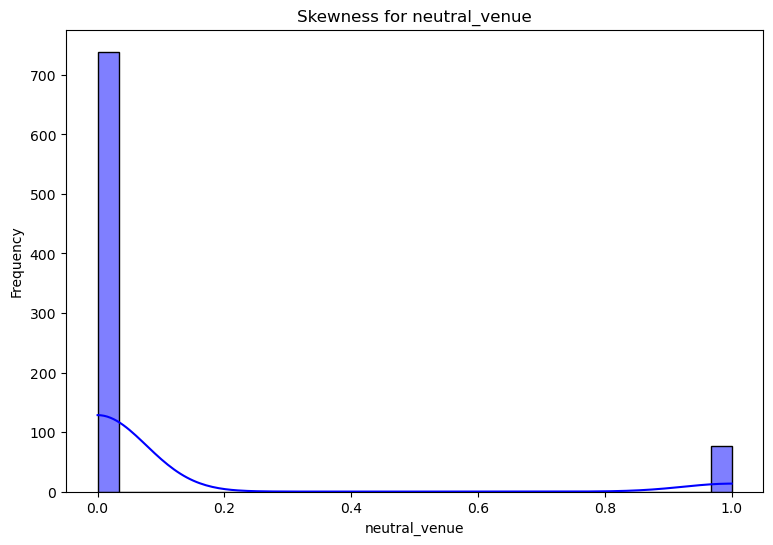

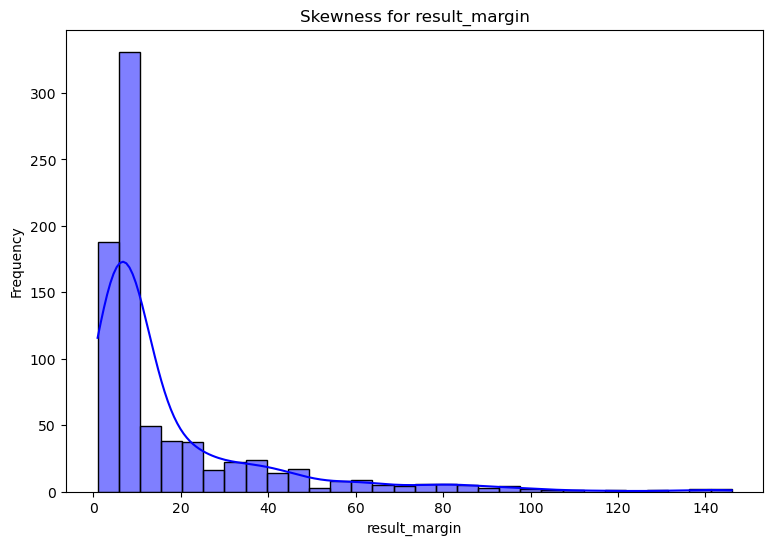

In [24]:
for col in num_df.columns:
    plt.figure(figsize = (9, 6))
    sns.histplot(num_df[col], kde = True, color = 'blue', bins = 30)
    
    plt.title(f'Skewness for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [25]:
# Kurtosis:

num_kurt = num_df.kurt()
num_kurt

id              -1.489369
neutral_venue    5.744078
result_margin    8.359213
dtype: float64

### Q-Q Plot:

In [26]:
import scipy.stats as stats

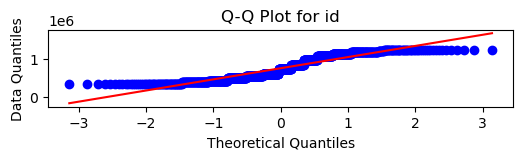

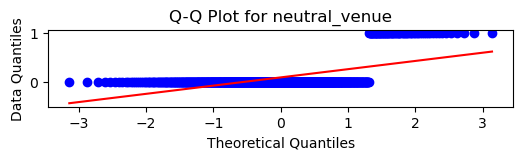

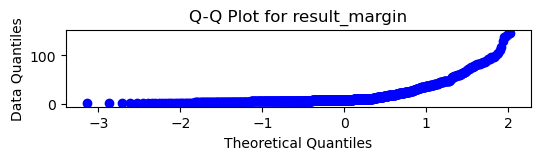

In [27]:
for col in num_df.columns:
    plt.figure(figsize=(6, 1))
    stats.probplot(num_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.ylabel("Data Quantiles")
    plt.xlabel("Theoretical Quantiles")

### Relation

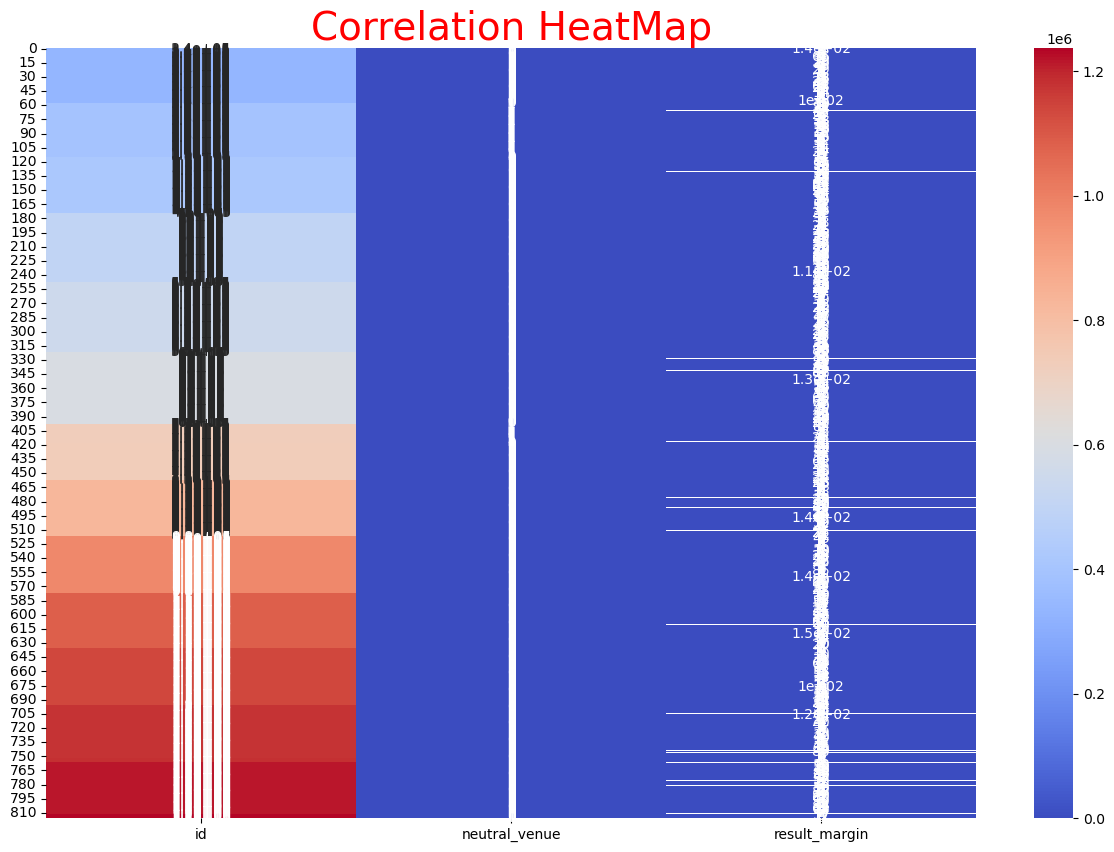

In [50]:
plt.figure(figsize =(15, 10))
sns.heatmap(num_df, cmap = 'coolwarm', annot = True)

plt.title('Correlation HeatMap', c = 'r', size = 28)
plt.show()

### Modifying the above to get clear Image:

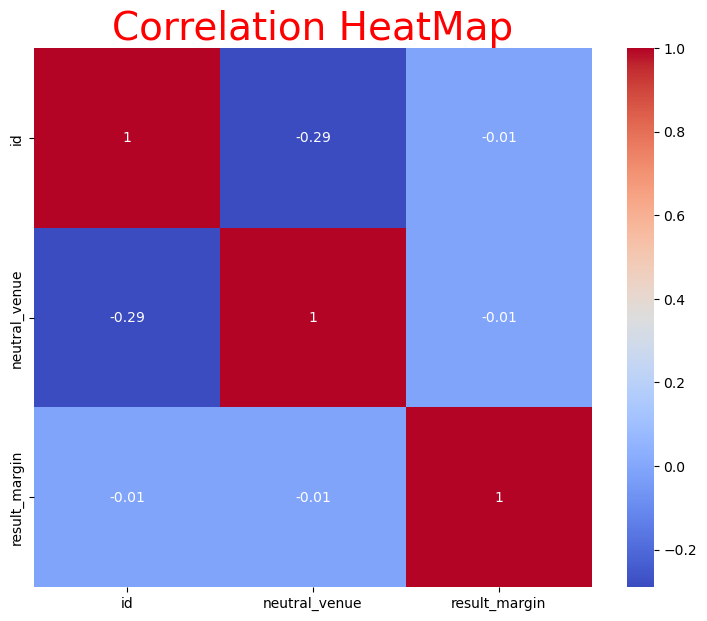

In [55]:
plt.figure(figsize =(9, 7))
sns.heatmap(num_df.corr().round(2), cmap = 'coolwarm', annot = True)

plt.title('Correlation HeatMap', c = 'r', size = 28)
plt.show()